In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
def clean_cols(cols):
    return [col.lower() for col in cols]

In [6]:
file_path = "../datasets/Pokemon.csv"
#file_path = "C:/Users/domen/github/pokemon_classification/datasets/Pokemon.csv"

df = pd.read_csv(file_path)
df.columns = clean_cols(df.columns)

In [17]:
df.head(4)

,#,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   name        800 non-null    object
 2   type 1      800 non-null    object
 3   type 2      414 non-null    object
 4   total       800 non-null    int64 
 5   hp          800 non-null    int64 
 6   attack      800 non-null    int64 
 7   defense     800 non-null    int64 
 8   sp. atk     800 non-null    int64 
 9   sp. def     800 non-null    int64 
 10  speed       800 non-null    int64 
 11  generation  800 non-null    int64 
 12  legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


As we had guessed, there is quite a significant class imbalance in the dataset. Less than 10% of the Pokemon are legendary.

In [8]:
print("-- pct")
print(df.legendary.value_counts(normalize=True))
print("-- counts")
print(df.legendary.value_counts())


-- pct
False    0.91875
True     0.08125
Name: legendary, dtype: float64
-- counts
False    735
True      65
Name: legendary, dtype: int64


array([[<AxesSubplot:title={'center':'hp'}>,
        <AxesSubplot:title={'center':'attack'}>,
        <AxesSubplot:title={'center':'defense'}>,
        <AxesSubplot:title={'center':'sp. atk'}>],
       [<AxesSubplot:title={'center':'sp. def'}>,
        <AxesSubplot:title={'center':'speed'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

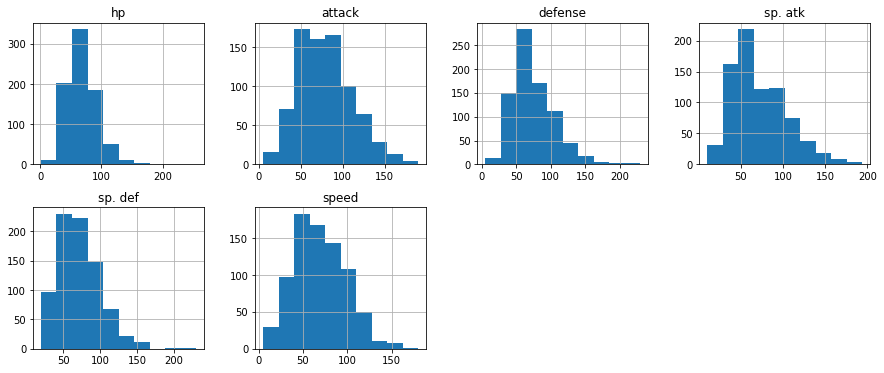

In [9]:
numerical = ['hp', 'attack', 'defense', 'sp. atk', 'sp. def', 'speed']
df[numerical].hist(figsize=(15,6), layout=(2,4))

[Text(0.5, 1.0, 'total stats by Pokemon generation')]

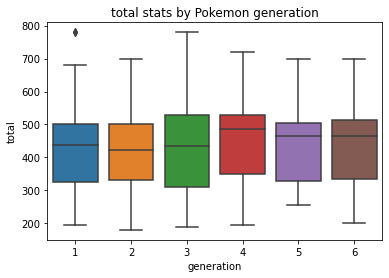

In [24]:
sns.boxplot(x=df.generation, y=df.total).set(title="total stats by Pokemon generation")

[Text(0.5, 1.0, 'total stats by Pokemon generation - no legendaries')]

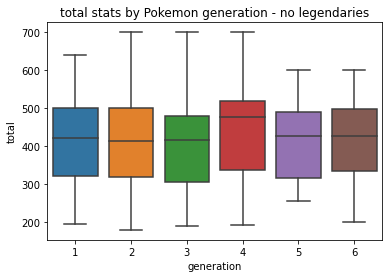

In [27]:
no_legendary_df = df[df.legendary==False]
(sns.boxplot(
    x=no_legendary_df.generation,
    y=no_legendary_df.total)
    .set(title="total stats by Pokemon generation - no legendaries"))


[Text(0.5, 1.0, 'total stats by Pokemon generation - only legendaries')]

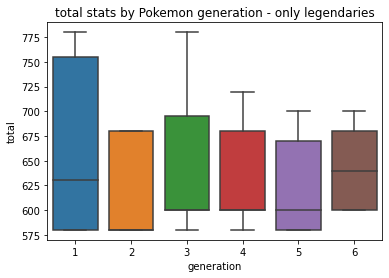

In [10]:
legendary_df = df[df.legendary==True]
(sns.boxplot(
    x=legendary_df.generation,
    y=legendary_df.total)
    .set(title="total stats by Pokemon generation - only legendaries"))


In [19]:
# import libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# load dataset
#poke = sns.load_dataset(df)

# set the figure size
plt.figure(figsize=(14, 14))

# from raw value to percentage
poke = df
total = poke.groupby('generation')['#'].count().reset_index()
total.head(8)
#leg = poke[poke.legendary==True].groupby('generation')['legendary'].sum().reset_index()
#poke[poke.legendary==True] = [i / j * 100 for i,j in zip(poke['legendary'], total['legendary'])]
#total['legendary'] = [i / j * 100 for i,j in zip(total['legendary'], total['legendary'])]

,generation,#
0,1,166
1,2,106
2,3,160
3,4,121
4,5,165
5,6,82


<Figure size 1008x1008 with 0 Axes>

Beause we have class imbalance, the following performance measures should be considered when evaluating our model:
- Confusion matrix
- Precision (exactness)
- Recall (completeness)
- F-score (weighted average of precision and recall)
- ROC curves (sensitivity and specificity)
- Kappa (or Cohen's kappa)